In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [2]:
df = pd.read_csv("Datasets/compiledDataset.csv")

In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
df.head()

age  sex  fever  cough  fatigue  abdominal pain  diarrhea  malaise  \
0   21    0      0      0        0               0         0        0   
1   25    0      0      0        1               0         0        0   
2   51    0      1      0        0               0         0        0   
3   62    1      1      0        0               0         0        0   
4   23    1      0      0        0               0         0        0   

   pneumonia  aching muscles  ...  runny nose  difficulty walking  sputum  \
0          0               0  ...           0                   0       1   
1          0               0  ...           0                   0       0   
2          0               1  ...           0                   0       0   
3          0               0  ...           0                   0       0   
4          0               0  ...           0                   0       0   

   pneumonitis  physical discomfort  toothache  wheezing  dry mouth  sweating  \
0            0                    0          0         0          0         0   
1            0                    0          0         0          0         0   
2            0                    0          0         0          0         0   
3            0                    0          0         0          0         0   
4            0                    0          0         0          0         0   

   covid_19  
0         0  
1         0  
2         1  
3         1  
4         0  

[5 rows x 35 columns]

In [5]:
corrDF = df.corr()
corrDF

age       sex     fever     cough   fatigue  \
age                  1.000000 -0.005992  0.380593  0.191307 -0.094005   
sex                 -0.005992  1.000000 -0.078681  0.016218  0.031509   
fever                0.380593 -0.078681  1.000000  0.170568 -0.180454   
cough                0.191307  0.016218  0.170568  1.000000 -0.068615   
fatigue             -0.094005  0.031509 -0.180454 -0.068615  1.000000   
abdominal pain      -0.108338  0.058538 -0.087500 -0.024999  0.127255   
diarrhea            -0.066829 -0.012710 -0.034692  0.020791  0.125784   
malaise             -0.172735 -0.070324 -0.187966 -0.075871  0.305755   
pneumonia            0.064143 -0.017293  0.035779 -0.023834 -0.025729   
aching muscles      -0.170919 -0.011875 -0.167567 -0.004851  0.224676   
anorexia            -0.061854  0.035400 -0.170232 -0.021023  0.202848   
asymptomatic        -0.313266 -0.012926 -0.393291 -0.156997  0.125081   
chest discomfort    -0.070265  0.032919 -0.157495 -0.008857  0.252249   
dyspnea              0.074109  0.002323 -0.056721  0.053758  0.080324   
nausea              -0.027745  0.055440 -0.057454  0.044917  0.161346   
vomitting           -0.022802 -0.058820 -0.046284  0.104734  0.116271   
chills               0.004605  0.014306 -0.033324 -0.022014  0.128976   
conjuctivitis       -0.205107  0.005107 -0.173562  0.000735  0.263839   
joint pain          -0.153987 -0.034406 -0.130942 -0.039259  0.281491   
headache            -0.196889  0.020687 -0.201120 -0.094180  0.296790   
weakness            -0.104329  0.023734 -0.122271 -0.015800  0.291499   
sore throat         -0.027957  0.072547 -0.014816  0.065796  0.109919   
sneezing            -0.127786 -0.023100 -0.087500 -0.053900  0.084654   
rhinorrhea          -0.028894  0.007293 -0.033760  0.039236  0.068010   
dizziness           -0.149151 -0.008786 -0.141819  0.050059  0.209311   
runny nose          -0.128958  0.055458 -0.058449  0.045320  0.066026   
difficulty walking  -0.016933 -0.028889 -0.012836 -0.011801  0.162278   
sputum              -0.046413 -0.027901 -0.121471  0.130382  0.093291   
pneumonitis          0.025751  0.025244 -0.202357 -0.117969 -0.061475   
physical discomfort  0.027548  0.008306 -0.009062  0.022150 -0.020225   
toothache            0.030199 -0.034687  0.034234 -0.027422 -0.014290   
wheezing             0.008729  0.046424  0.034234 -0.027422 -0.014290   
dry mouth            0.017069  0.114175 -0.082374  0.003179  0.016903   
sweating            -0.006299  0.046424 -0.047039  0.058722 -0.014290   
covid_19             0.567553 -0.010796  0.640927  0.242032 -0.284840   

                     abdominal pain  diarrhea   malaise  pneumonia  \
age                       -0.108338 -0.066829 -0.172735   0.064143   
sex                        0.058538 -0.012710 -0.070324  -0.017293   
fever                     -0.087500 -0.034692 -0.187966   0.035779   
cough                     -0.024999  0.020791 -0.075871  -0.023834   
fatigue                    0.127255  0.125784  0.305755  -0.025729   
abdominal pain             1.000000  0.170527  0.297347   0.065355   
diarrhea                   0.170527  1.000000  0.114612   0.047252   
malaise                    0.297347  0.114612  1.000000   0.022035   
pneumonia                  0.065355  0.047252  0.022035   1.000000   
aching muscles             0.141117  0.102978  0.301501   0.014713   
anorexia                   0.213198  0.104684  0.210713   0.030171   
asymptomatic               0.089398 -0.013846  0.134788  -0.055983   
chest discomfort           0.098398  0.229386  0.143790   0.010821   
dyspnea                    0.124101  0.091193  0.115362   0.073998   
nausea                     0.264642  0.057219  0.154527   0.118245   
vomitting                  0.091555  0.249398  0.187580   0.059975   
chills                     0.176506  0.137954  0.106783   0.016806   
conjuctivitis              0.249388  0.027322  0.343900   0.018454   
joint pain                 0.176506  0.137954  0.277966   0.067550 

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop("covid_19",axis=1)
y = df["covid_19"]

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

# Benchmarking with a Simple Logistic Model

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)

/home/prajwol/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
from sklearn.metrics import classification_report
print("-"*30)

y_pred = log_reg.predict(X_train)
print("Logistic Regression - Training set")
print("-"*30)
print(classification_report(y_train, y_pred))

print("-"*30)

y_pred = log_reg.predict(X_test)
print("Logistic Regression - Test set")
print("-"*30)
print(classification_report(y_test, y_pred))

------------------------------
Logistic Regression - Training set
------------------------------
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       120
           1       0.99      0.97      0.98       377

    accuracy                           0.97       497
   macro avg       0.95      0.97      0.96       497
weighted avg       0.97      0.97      0.97       497

------------------------------
Logistic Regression - Test set
------------------------------
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        31
           1       0.99      0.98      0.98        94

    accuracy                           0.98       125
   macro avg       0.96      0.97      0.97       125
weighted avg       0.98      0.98      0.98       125



# SVM Classifier

In [12]:
from sklearn.svm import SVC

In [13]:
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

/home/prajwol/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [14]:
from sklearn.metrics import classification_report
print("-"*30)

y_pred = svc.predict(X_train)
print("SVM - Training set")
print("-"*30)
print(classification_report(y_train, y_pred))

print("-"*30)

y_pred = svc.predict(X_test)
print("SVM - Test set")
print("-"*30)
print(classification_report(y_test, y_pred))



------------------------------
SVM - Training set
------------------------------
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       120
           1       0.98      0.98      0.98       377

    accuracy                           0.97       497
   macro avg       0.96      0.96      0.96       497
weighted avg       0.97      0.97      0.97       497

------------------------------
SVM - Test set
------------------------------
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        31
           1       0.96      0.98      0.97        94

    accuracy                           0.95       125
   macro avg       0.94      0.92      0.93       125
weighted avg       0.95      0.95      0.95       125



In [27]:
accuracy_score(y_test, y_pred)

0.952

In [34]:
df.columns

Index(['age', 'sex', 'fever', 'cough', 'fatigue', 'abdominal pain', 'diarrhea',
       'malaise', 'pneumonia', 'aching muscles', 'anorexia', 'asymptomatic',
       'chest discomfort', 'dyspnea', 'nausea', 'vomitting', 'chills',
       'conjuctivitis', 'joint pain', 'headache', 'weakness', 'sore throat',
       'sneezing', 'rhinorrhea', 'dizziness', 'runny nose',
       'difficulty walking', 'sputum', 'pneumonitis', 'physical discomfort',
       'toothache', 'wheezing', 'dry mouth', 'sweating', 'covid_19'],
      dtype='object')

In [31]:
# save the model to disk
filename = './Models/svmModel.sav'
pickle.dump(svc, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
# classify = loaded_model.predict("get a chance to win $10,000 by clicking this link")
print(result)

0.952


# Standardize the Data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
features = X.columns
feat = X

# Separating out the features
x = feat.loc[:, features].values

# Separating out the target
y = df.loc[:,['covid_19']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

# PCA Projection to 2D

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [19]:
principalDf.head()

principal component 1  principal component 2
0               2.735322              -2.027325
1               0.110142              -1.283680
2               0.398807               0.560965
3              -1.275124               0.504076
4              -0.110629              -2.527894

In [20]:
finalDf = pd.concat([principalDf, df[['covid_19']]], axis = 1)

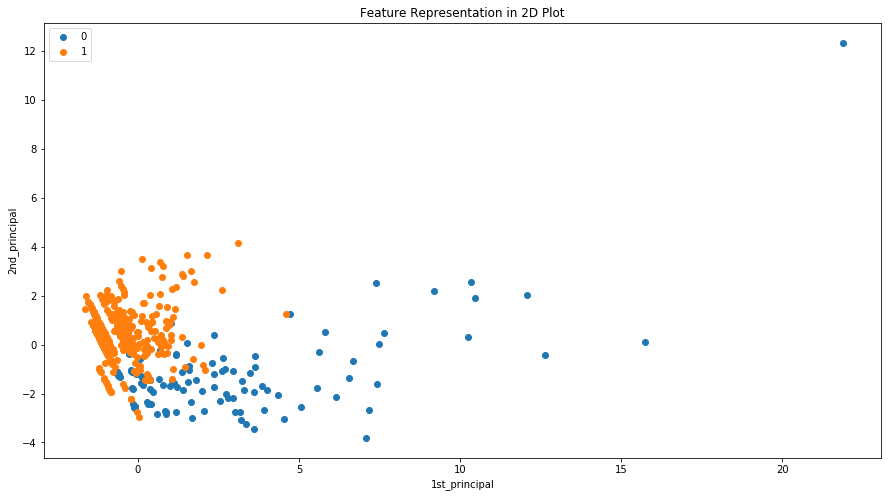

In [21]:
plt.figure(figsize=(15, 8))
label = np.array(df.covid_19)
for i in set(label):
    d = finalDf[label == i]
    plt.scatter(x=d['principal component 1'], y=d['principal component 2'], label=i)

plt.xlabel("1st_principal")
plt.ylabel("2nd_principal")
plt.title("Feature Representation in 2D Plot")
plt.legend()

In [35]:
inpDF = pd.DataFrame(np.nan, index=[0], columns=['Clickbaits'])
inpDF

Clickbaits
0         NaN